In [74]:
! pip install -U langgraph langchain-openai langchain langsmith


[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [75]:
from langgraph.prebuilt import create_react_agent
from langchain.chat_models import init_chat_model
from langgraph.checkpoint.memory import InMemorySaver

def get_weather(city:str) -> str:
    """Get weather for a given city"""
    return f"Its always rainy in {city}"


checkpointer = InMemorySaver()

model=init_chat_model(
    "gpt-4.1-mini",
    temperature=0
)

config = {"configurable": {"thread_id":"1"}}

agent=create_react_agent(
    model=model,
    tools=[get_weather],
    checkpointer=checkpointer,
    prompt="You are an helpful assistant"
)

agent.invoke({
    "messages":[{"role": "user","content":"what is weather in Hyderabad"}]
},
  config
  )

{'messages': [HumanMessage(content='what is weather in Hyderabad', additional_kwargs={}, response_metadata={}, id='8673d4b7-afe0-49f0-a20d-3e581407dc71'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_HgpfToZidNltA0h6U2iKIQgh', 'function': {'arguments': '{"city":"Hyderabad"}', 'name': 'get_weather'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 55, 'total_tokens': 70, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_6f2eabb9a5', 'id': 'chatcmpl-BebyL3Xq2pJuOdZ0tnei2fcXmuHKq', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--90790ca9-491d-469f-8d71-aa41f10555f3-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'Hyderabad'}, 'id'

In [76]:
agent.invoke({
    "messages":[{"role": "user","content":"what about Rajamundry"}]
},
  config
  )

{'messages': [HumanMessage(content='what is weather in Hyderabad', additional_kwargs={}, response_metadata={}, id='8673d4b7-afe0-49f0-a20d-3e581407dc71'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_HgpfToZidNltA0h6U2iKIQgh', 'function': {'arguments': '{"city":"Hyderabad"}', 'name': 'get_weather'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 55, 'total_tokens': 70, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_6f2eabb9a5', 'id': 'chatcmpl-BebyL3Xq2pJuOdZ0tnei2fcXmuHKq', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--90790ca9-491d-469f-8d71-aa41f10555f3-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'Hyderabad'}, 'id'

In [77]:
from pydantic import BaseModel

class WeatherResp(BaseModel):
    conditions: str
    
agent= create_react_agent(
    model,
    tools=[get_weather],
    response_format=WeatherResp
)


resp=agent.invoke({
    "messages":[{"role": "user","content":"what about Rajamundry"}]
},)

In [78]:
resp["structured_response"].conditions

'Its always rainy in Rajamundry'

In [79]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph,START,END
from langgraph.graph import add_messages

class State(TypedDict):
    messages: Annotated[list,add_messages]
    
graph_builder=StateGraph(State)

llm=init_chat_model("openai:gpt-4.1")

def chatbot(state: State):
    return {"messages":[llm.invoke(state["messages"])]}

graph_builder.add_node("chatbot",chatbot)

graph_builder.add_edge(START,"chatbot")

graph=graph_builder.compile()


In [80]:
! pip install -U ipython


[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


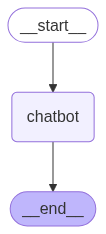

In [81]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [82]:
res=graph.invoke({"messages": ["Hi Hello how are you"]})

In [83]:
res["messages"][-1].content

"Hello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you. How can I assist you today? 😊"

In [84]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

In [85]:
stream_graph_updates("What is the Future of AI")

Assistant: The **future of AI** is a topic of great excitement, speculation, and debate. Based on current trends and expert insights, here’s an overview of what to expect:

---

## **1. Continued Rapid Advancement**
AI is evolving faster than anticipated, particularly with large language models (like GPT-4 and successors) and advancements in computer vision, robotics, and generative media.

- **Models will be more powerful, multi-modal (understanding text, images, audio, and video), and context-aware.**
- **Smaller, faster, and cheaper AI models will be democratized, making AI accessible to more individuals and businesses.**

---

## **2. Ubiquity Across Sectors**
AI will become a core part of:

- **Healthcare:** Diagnosis, drug discovery, and personalized medicine.
- **Education:** Personalized learning, tutoring, and curriculum design.
- **Finance:** Fraud detection, personalized banking, and trading.
- **Transportation:** Autonomous vehicles, traffic management, and logistics.
- **C

In [86]:
stream_graph_updates("What question did I have asked you ?")

Assistant: Your question was: **"What question did I have asked you ?"**

If you meant **what was your previous question**, this is the *first* question you've asked me in this conversation.

If you meant **what is this question grammatically**, it is a self-referential question asking me to recall the current or a previous query you made.

Let me know if you meant something different!


In [87]:
! pip install -U langchain-tavily


[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [88]:
! pip install dotenv


[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [89]:
from dotenv import load_dotenv

load_dotenv()

True

In [90]:
import os
os.getenv("TAVILY_API_KEY")

'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'

In [91]:
from langchain_tavily import TavilySearch

tool=TavilySearch(max_results=2,
                  api_key="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")
tools=[tool]

tool.invoke("Who is the current president of the USA")

{'query': 'Who is the current president of the USA',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'List of presidents of the United States - Wikipedia',
   'url': 'https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States',
   'content': 'The current president of the United States is Donald Trump, who assumed office on January 20, 2025. This web page provides a comprehensive list of all 47 presidents from George Washington to Donald Trump, with their portraits, terms, parties, and vice presidents.',
   'score': 0.91795975,
   'raw_content': None},
  {'title': 'Presidents, vice presidents, and first ladies - USAGov',
   'url': 'https://www.usa.gov/presidents',
   'content': 'Learn about the current and past leaders of the United States, their duties, and how to contact them. The 50th and current vice president is James David (JD) Vance, and the first lady is Melania Trump.',
   'score': 0.7402687,
   'raw_content': None}],
 'response_t

In [92]:

{tool.name: tool for tool in tools}

{'tavily_search': TavilySearch(max_results=2, api_wrapper=TavilySearchAPIWrapper(tavily_api_key=SecretStr('**********')))}

In [93]:
llm_with_tools=llm.bind_tools(tools)

In [94]:
def chatbot(state: State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

In [ ]:
import json
from langchain_core.messages import ToolMessage

class BasicToolNode:
    """A node that runs the tools which is requested in last AI Message"""
    
    def __init__(self,tools:list):
        self.tools_by_name={tool.name: tool for tool in tools}
    
    def __call__(self, inputs:dict):
        if messages:= inputs.get("messages",[]):
            message=messages[-1]
        else:
            raise ValueError("No message found in input")

        # LLM is giving toolName and tool Args
        outputs=[]
        for tool_call in message.tool_calls:
            tool_result=self.tools_by_name[tool_call["name"]].invoke(
                tool_call["args"]
            )
            
            outputs.append(
                ToolMessage(
                    content=json.dumps(tool_result),
                    name=tool_call["name"],
                    tool_call_id=tool_call["id"],
                )     
            )
        return {"messages": outputs}

In [96]:
from langgraph.graph import END
def route_tools(state:State):
    """
    Used in the conditional edge to route to the ToolNode if the last message has the tool call. Otherwise route to the end 
    """
    
    if isinstance(state,list):
        ai_message=state[-1]
    elif messages:=state.get("messages",[]):
        ai_message=messages[-1]
    else:
        raise ValueError('No Message found in input to tool edge')
    
    if hasattr(ai_message,"tool_calls") and len(ai_message.tool_calls) >0 :
        return "tools"
    
    return END

In [97]:
graph_builder=StateGraph(State)

graph_builder.add_node("chatbot",chatbot)

tool_node=BasicToolNode(tools=[tool])
graph_builder.add_node("tools",tool_node)

In [98]:
graph_builder.add_conditional_edges(
    "chatbot",
    route_tools,
    {"tools": "tools", END: END},
)

In [99]:
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")
graph = graph_builder.compile()

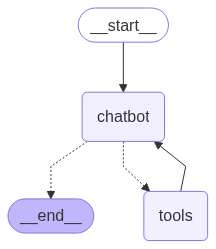

In [100]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [101]:
def custom_graph_update(user_input : str):
    res= graph.invoke({"messages": [{"role":"user","content":user_input}]})
    print("Assistant:", res["messages"][-1].content)

In [102]:
custom_graph_update("Who is current USA president")

Assistant: The current president of the United States is Donald John Trump. He was sworn into office on January 20, 2025.


In [103]:
## With Prebuilt Tools

In [104]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from typing_extensions import Annotated
from langchain_tavily import TavilySearch
from langgraph.prebuilt import ToolNode,tools_condition
from langgraph.checkpoint.memory import MemorySaver

In [105]:
class State(TypedDict):
    messages: Annotated[list,add_messages]

graph_builder=StateGraph(State)
llm = init_chat_model("openai:gpt-4.1")
tools = [TavilySearch(max_results=2)]
llm_with_tools.bind_tools(tools)
memory=MemorySaver()

def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot",chatbot)

tool_node = ToolNode(tools)
graph_builder.add_node("tools",tool_node)

graph_builder.add_conditional_edges("chatbot",tools_condition)

graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("tools","chatbot")


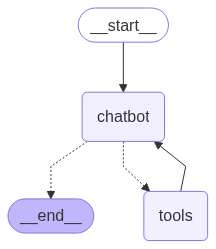

In [106]:
from IPython.display import Image, display

graph = graph_builder.compile(checkpointer=memory)

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [109]:
user_input = "Hi there! My name is Will."

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [{"role": "user", "content": user_input}]},
    config,
    stream_mode="values",
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi there! My name is Will.
================================== Ai Message ==================================

Hi again, Will! How can I assist you today? If you have any questions or need help with something, just let me know.


In [112]:
res=graph.invoke({"messages": [{"role":"user","content":"Hi My name is Manideep"}]},config)

res["messages"][-1].content

'Hello, Manideep! It’s great to meet you. How can I assist you today?'

In [113]:
res=graph.invoke({"messages": [{"role":"user","content":"What is my Name"}]},config)

res["messages"][-1].content

'Your name is Manideep. How can I help you today, Manideep?'

In [114]:
snapshot=graph.get_state(config)

In [115]:
snapshot

StateSnapshot(values={'messages': [HumanMessage(content='Hi there! My name is Will.', additional_kwargs={}, response_metadata={}, id='7b7b29a4-1cad-4537-b1d4-92ff4a4f983c'), AIMessage(content='Hi Will! Great to meet you. How can I help you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 775, 'total_tokens': 791, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_51e1070cf2', 'id': 'chatcmpl-BebzVw7eHpinmz0M2hpbkBikxV9ac', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--8f79b84d-5761-4b49-809e-7fc242e79bd2-0', usage_metadata={'input_tokens': 775, 'output_tokens': 16, 'total_tokens': 791, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'au

In [ ]:
#Human Input Added

In [135]:
from langgraph.types import Command,interrupt
from langchain_core.tools import tool

class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

@tool
def human_assistance(query: str) -> str:
    """Request assistance from a human."""
    human_response = interrupt({"query": query})
    return human_response["data"]

tool = TavilySearch(max_results=2)
tools = [tool, human_assistance]
llm_with_tools = llm.bind_tools(tools)

def chatbot(state: State):
    message = llm_with_tools.invoke(state["messages"])
    # Because we will be interrupting during tool execution,
    # we disable parallel tool calling to avoid repeating any
    # tool invocations when we resume.
    assert len(message.tool_calls) <= 1
    return {"messages": [message]}

graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")

graph = graph_builder.compile(checkpointer=memory)

In [136]:
user_input = "I need some expert guidance for building an AI agent. Could you request assistance for me?"
config = {"configurable": {"thread_id": "1"}}

events = graph.stream(
    {"messages": [{"role": "user", "content": user_input}]},
    config,
    stream_mode="values",
)
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

I need some expert guidance for building an AI agent. Could you request assistance for me?
================================== Ai Message ==================================
Tool Calls:
  human_assistance (call_miLRV51tJAwArDYr8jori5BS)
 Call ID: call_miLRV51tJAwArDYr8jori5BS
  Args:
    query: I need expert guidance for building an AI agent. Could you provide assistance or connect me with an expert?


In [137]:
snapshot=graph.get_state(config)
snapshot.next

('tools',)

In [138]:
human_message=(
  "We, the experts are here to help! We'd recommend you check out LangGraph to build your agent."
    " It's much more reliable and extensible than simple autonomous agents."
)

human_command=Command(resume={"data":human_message})


events = graph.stream(human_command, config, stream_mode="values")
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  human_assistance (call_miLRV51tJAwArDYr8jori5BS)
 Call ID: call_miLRV51tJAwArDYr8jori5BS
  Args:
    query: I need expert guidance for building an AI agent. Could you provide assistance or connect me with an expert?
================================= Tool Message =================================
Name: human_assistance

We, the experts are here to help! We'd recommend you check out LangGraph to build your agent. It's much more reliable and extensible than simple autonomous agents.
================================== Ai Message ==================================

Great news! Expert guidance is available, and a strong recommendation is to use LangGraph for building your AI agent. LangGraph is considered more reliable and extensible than traditional autonomous agent frameworks.

If you'd like more detail on how to get started with LangGraph, its advantages, or best practices for AI agent developme